```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Area Plot (a)
B. Histogram (a)
C. Bar Chart (a)
D. Pie Chart (a)
E. Box Plot  (a)
F. Scatter Plot (a)
G. Word Clouds
H. Folium Maps
I. Overall Analysis

*for each plot (A - F):
- Question/what data we want to visualize
- Pre-processing as needed
- (a)or analysis :: Conclusion / Kesimpulan
```

# Import Library

In [1]:
import numpy as np
import pandas as pd


In [2]:
import folium
import requests
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# EDA

In [3]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [6]:
df['year'].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

---
# A. Area Plot

**Question**

Dari keseluruhan data, 5 wilayah manakah yang memiliki jumlah kasus kriminal tertinggi?

**Pre-processing**

In [7]:
# Membuat dataframe baru
df_use = df.copy()

# Membuat dataframe baru dengan agregat
df_use_1 = df_use.groupby(['borough','year'])[["value"]].sum().reset_index()

# Membuat tabel pivot dengan value sebagai value
pivoted = df_use_1.pivot(index="borough", columns="year", values="value")
pivoted["total"] = pivoted.sum(axis=1)
pivoted = pivoted.sort_values(by = ['total'], ascending = False)

# Menentukan 5 wilayah teratas dan mentranspose tabel sehingga borough menjadi kolom
top_5 = pivoted.head(5)
top_5 = top_5.drop(columns = {'total'})
top_5 = top_5.transpose()
top_5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


**Create data visualization**

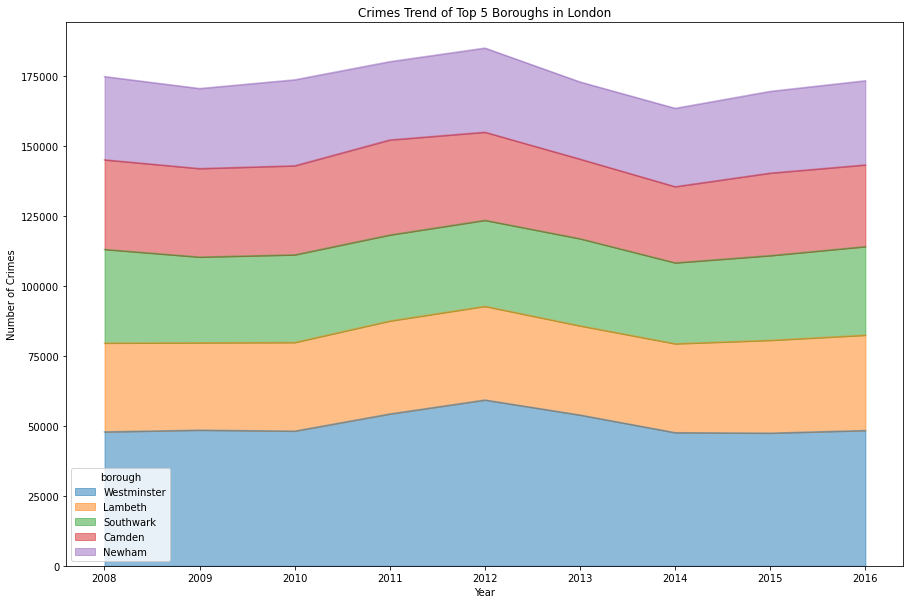

In [8]:
# 2. create visualization
#Membuat Area Plot
top_5.plot(kind="area",
                    stacked=True,
                    figsize=(15,10),
                    alpha=0.5
                    )
plt.title("Crimes Trend of Top 5 Boroughs in London")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")

#Display plot
plt.show()


**Conclusion**


Wilayah yang masuk ke-5 besar tindak kejahatan adalah Westminster, Lambeth, Southwark, Camden, dan Newham. Grafik memperlihatkan bahwa grafiknya masih stabil dan hanya menunjukkan sedikit kenaikan pada tahun 2012 dengan kenaikan yang cukup sama pada kelima wilayah.

---
# B. Histogram

#### Question

Bagaimana trend jumlah kejahatan yang terjadi pada tahun 2014?

In [9]:
# Mengambil data jumlah tindakan kriminal di wilayah masing - masing pada London pada tahun 2012.
df_use_2 = pivoted[2014]

# Menghitung banyak bin
count, bin_edges = np.histogram(df_use_2)
df_use_2

borough
Westminster               47564
Lambeth                   31765
Southwark                 28912
Camden                    27198
Newham                    28005
Croydon                   27357
Ealing                    24978
Islington                 24679
Tower Hamlets             25504
Brent                     24426
Hackney                   24893
Lewisham                  21101
Haringey                  22773
Barnet                    22572
Hillingdon                23128
Wandsworth                21364
Waltham Forest            20271
Enfield                   21700
Hounslow                  20005
Hammersmith and Fulham    19185
Bromley                   19668
Redbridge                 19590
Greenwich                 19894
Kensington and Chelsea    17840
Barking and Dagenham      15426
Havering                  14734
Harrow                    11909
Merton                    11596
Bexley                    11844
Sutton                    10443
Richmond upon Thames      10456


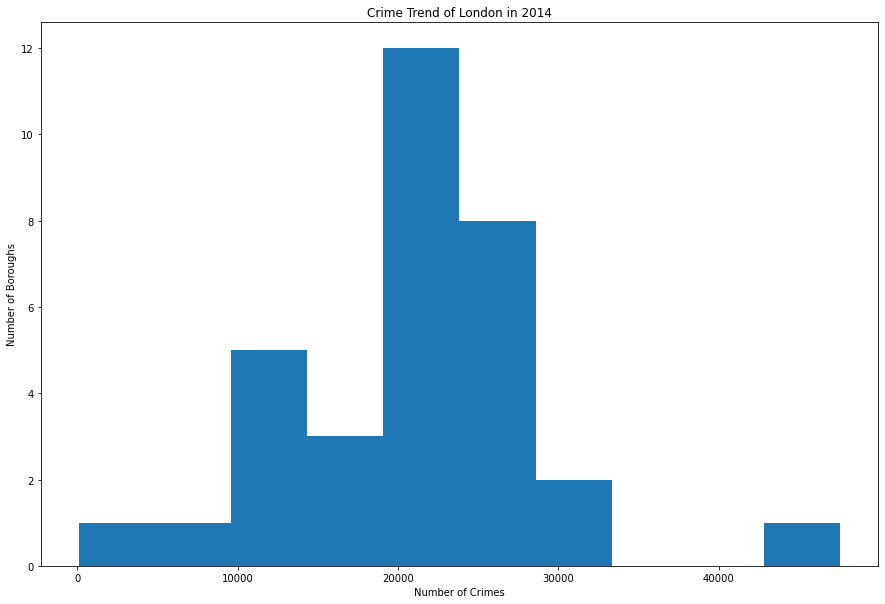

In [10]:
#Membuat plot Histogram
df_use_2.plot(kind="hist", figsize=(15,10))
plt.title("Crime Trend of London in 2014")
plt.ylabel("Number of Boroughs")
plt.xlabel("Number of Crimes")

#Display plot
plt.show()

#### Kesimpulan

Berdasarkan histogram di atas dapat dilihat bahwa ada 12 wilayah yang memiliki 20.000 - 25.000 kasus kejahatan dalam setahun dan hanya ada 1 wilayah yang memiliki tingkat kejahatan > 40.000 dan 2 wilayah yang jumlah kejahatannya < 10.000 kasus

---
# C. Bar Chart


#### Question

Bagaimana perbandingan jumlah kasus kriminal berdasarkan data pada wilayah di London?

In [11]:
df_use_3 = df.groupby(['borough', 'major_category'])[['value']].sum().reset_index()
df_use_3.rename(columns={"value":"total_kasus"}, inplace=True)

df_use_3 = df_use_3.pivot(index="borough", columns="major_category", values="total_kasus")
df_use_3

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,18103.0,18888.0,9188.0,205.0,2819.0,6105.0,49.0,50999.0,43091.0
Barnet,36981.0,21024.0,9796.0,175.0,2953.0,7374.0,38.0,87285.0,46565.0
Bexley,14973.0,17244.0,7346.0,106.0,1999.0,2338.0,22.0,40071.0,30037.0
Brent,28923.0,20569.0,25978.0,157.0,3711.0,12473.0,39.0,72523.0,63178.0
Bromley,27135.0,24039.0,8942.0,196.0,2637.0,4868.0,31.0,69742.0,46759.0
Camden,27939.0,18482.0,21816.0,123.0,3857.0,9286.0,36.0,140596.0,53012.0
City of London,15.0,16.0,33.0,NaN,17.0,24.0,NaN,561.0,114.0
Croydon,33376.0,31218.0,19162.0,270.0,4340.0,12645.0,55.0,91437.0,67791.0
Ealing,30831.0,25613.0,18591.0,175.0,4406.0,9568.0,52.0,93834.0,68492.0


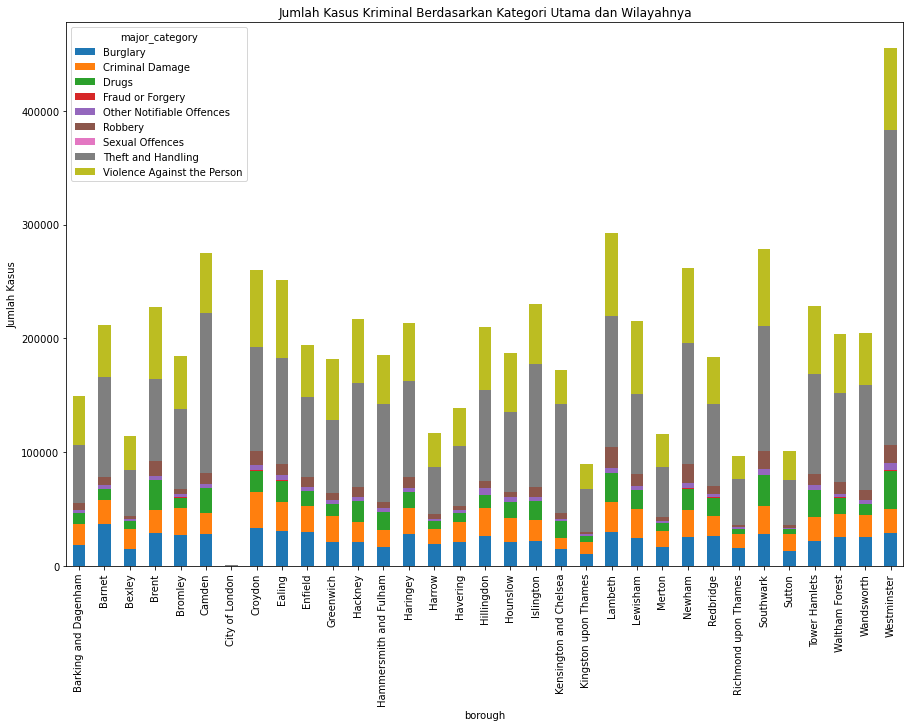

In [12]:
df_use_3.plot(kind='bar', stacked=True, figsize=(15,10))
plt.title("Jumlah Kasus Kriminal Berdasarkan Kategori Utama dan Wilayahnya")
plt.ylabel("Jumlah Kasus")

plt.show()

#### Kesimpulan

Dari grafik di atas dapat disimpulkan bahwa memang Westminster merupakan wilayah dengan tingkat atau jumlah kasus kriminal terbanyak sedangkan Kingston upon Thames merupakan wilayah dengan jumlah kasus paling rendah. Sementara itu, kasus kriminal yang paling sering terjadi adalah Theft and Handling sedangkan untuk yang paling jarang terjadi adalah Fraud or Forgery

---
# D. Pie Chart

#### Question

Bagaimana persentase kejadian kasus kriminal pada major_category?

In [13]:
df_use_4= df.groupby(["major_category"])[["value"]].sum()
df_use_4.rename(columns={"value":"total_kasus"}, inplace=True)
df_use_4

,total_kasus
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


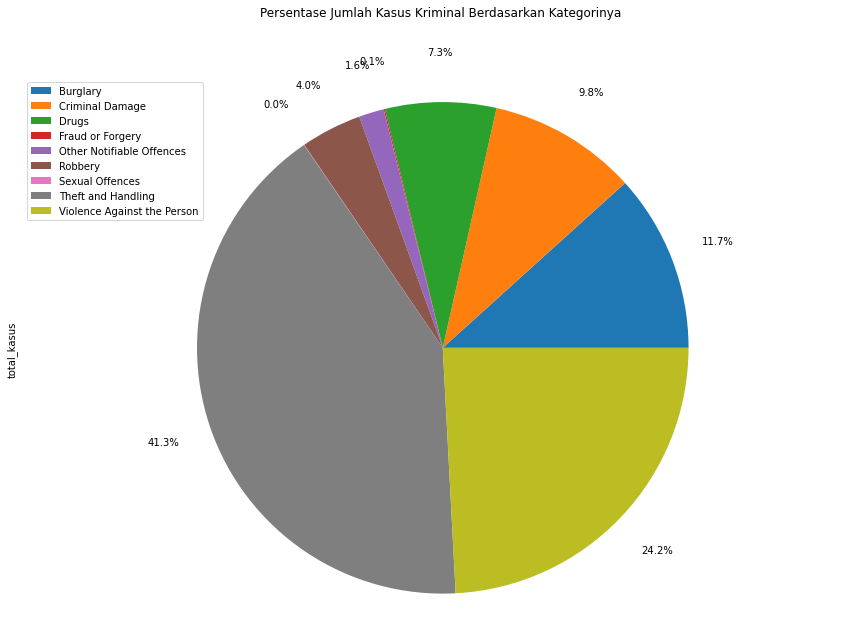

In [14]:
df_use_4["total_kasus"].plot(kind="pie", figsize=(15,10), autopct="%1.1f%%", pctdistance=1.2, labels=None)
plt.title("Persentase Jumlah Kasus Kriminal Berdasarkan Kategorinya", y = 1.1)
plt.axis("equal")
plt.legend(labels=df_use_4.index, loc="upper left")

plt.show()

#### Kesimpulan

Dari grafik di atas dapat disimpulkan bahwa kasus kriminal yang paling sering terjadi adalah Theft and Handling diikuti Violence againts a person lalu Burglary sedangkan untuk yang paling jarang terjadi adalah Fraud or Forgery

---
# E. Box Plot

#### Question

Bagaimana kondisi sebaran data untuk kasus kriminal di Westminster?

In [15]:
df_use_5 = df[df['borough'] == 'Westminster']
df_use_5 = df_use_5.groupby(["major_category",'year'])[['value']].sum().reset_index()
df_use_5 = df_use_5.pivot(index="year", columns="major_category", values="value")
df_use_5

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,2962,2599,4075,273,588,1327,59,29266,6697
2009,2957,2564,3894,0,611,1410,0,29967,7053
2010,2682,2385,4632,0,660,1439,0,29191,7127
2011,2900,2246,5670,0,652,1814,0,33529,7432
2012,4083,2254,4654,0,641,2312,0,38152,7130
2013,3906,2080,4151,0,762,2198,0,33868,6887
2014,3435,2016,2804,0,800,1933,0,28144,8432
2015,3152,2082,2102,0,726,1497,0,27980,9856
2016,3218,2179,2049,0,708,1822,0,27520,10834


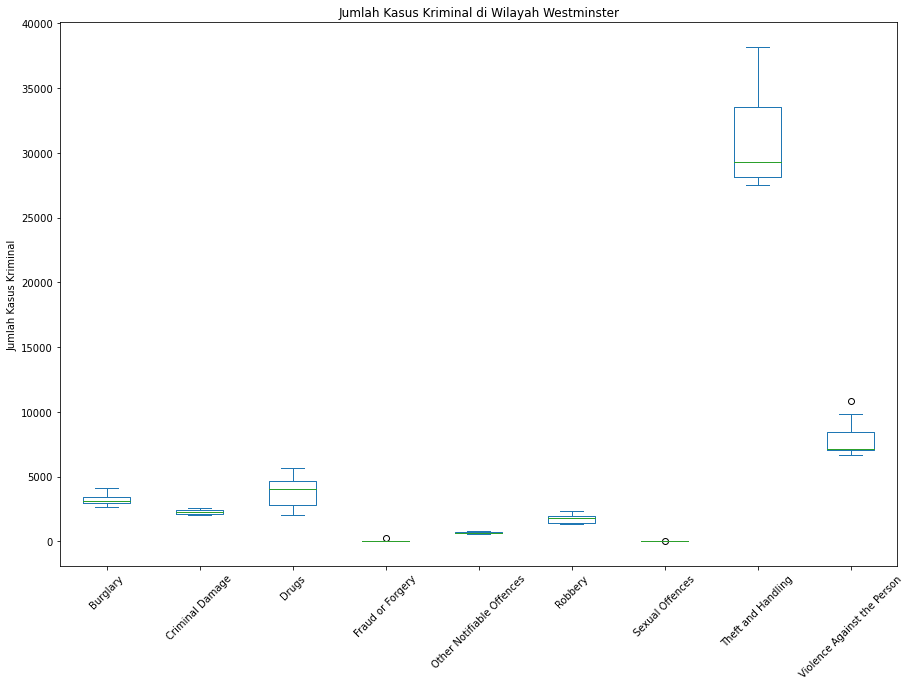

In [16]:
df_use_5.plot(kind="box", figsize=(15,10))
plt.title("Jumlah Kasus Kriminal di Wilayah Westminster")
plt.ylabel("Jumlah Kasus Kriminal")
plt.xticks(rotation=45)

plt.show()

#### Kesimpulan

Berdasarkan grafik di atas sekali lagi dibuktikan bahwa memang kasus kriminal yang paling sering terjadi adalah Theft and Handling diikuti Violence againts a person sedangkan untuk yang paling jarang terjadi di wilayah Westminster ini adalah Sexual Offences. Hal ini sedikit berbeda dengan data keseluruhan yang berarti secara umum kasus Sexual Offences terjadi cukup banyak di wilayah lain. Selain itu, dapat dilihat ada beberapa lingkaran yang menunjukkan outlier atau data pencilan seperti pada Violence Against the Person yang berarti bahwa ada tahun dimana kasus ini melonjak tinggi ke angka 12000an yang bahkan sebelumnya rata - rata hanya 6000 kasus.

---
# F. Scatter Plot

#### Question

Bagaimana sebaran jumlah kasus kejahatan di london dalam 2008-2016?

In [34]:
df_use_6 = df[df['borough'] == 'Westminster']
df_use_6 = df_use_6.groupby(["major_category",'year'])[['value']].sum().reset_index()
df_use_6 = df_use_6.pivot(index="year", columns="major_category", values="value").reset_index()
df_use_6.rename(columns={"index":"year"}, inplace=True)
df_use_6

major_category,year,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
0,2008,2962,2599,4075,273,588,1327,59,29266,6697
1,2009,2957,2564,3894,0,611,1410,0,29967,7053
2,2010,2682,2385,4632,0,660,1439,0,29191,7127
3,2011,2900,2246,5670,0,652,1814,0,33529,7432
4,2012,4083,2254,4654,0,641,2312,0,38152,7130
5,2013,3906,2080,4151,0,762,2198,0,33868,6887
6,2014,3435,2016,2804,0,800,1933,0,28144,8432
7,2015,3152,2082,2102,0,726,1497,0,27980,9856
8,2016,3218,2179,2049,0,708,1822,0,27520,10834


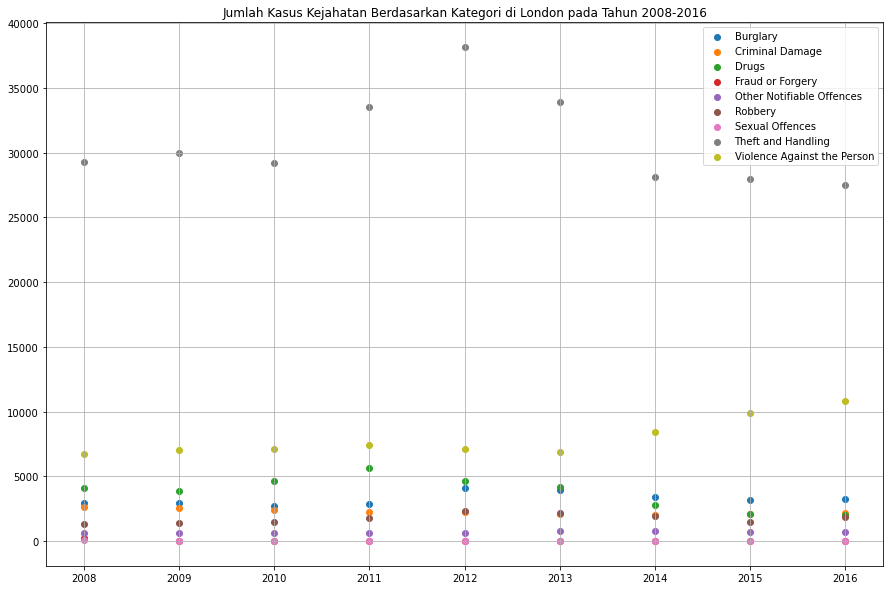

In [76]:
fig, ax = plt.subplots(figsize=(15, 10))

legend = []
for crime in df_use_6.columns:
    if crime != 'year':
        legend.append(crime)
        ax.scatter(df_use_6['year'], df_use_6[crime])
        
ax.set_title('Jumlah Kasus Kejahatan Berdasarkan Kategori di London pada Tahun 2008-2016')
ax.legend(legend)
ax.grid(True)              
plt.show()

#### Kesimpulan

Berdasarkan grafik di atas diketahui bahwa memang Theft and Handling merupakan kejahatan yang sering terjadi dengan peningkatan kasus pada tahun 2012 sebesar 50%. Sementara itu, ternyata tidak semua kasus meningkat pada tahun 2012 secara umum dan hanya Violence Against the Person yang meningkat pada 3 tahun terakhirnya.

# G. Word Clouds

#### Question

Kapan tahun yang memiliki jumlah kasus yang besar, tunjukkan menggunakan word clouds?

In [95]:
df_use_7 = df.groupby(["year"])[["value"]].sum()

df_use_7.rename(columns={"value":"total"}, inplace=True)
df_use_7

,total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


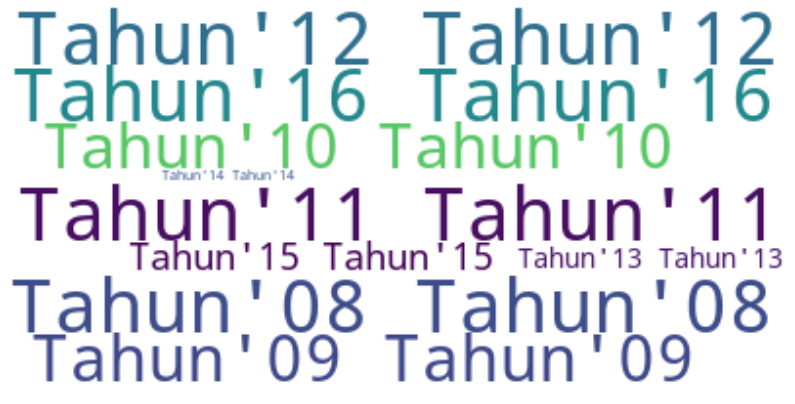

In [117]:
total_crime = df_use_7["total"].sum()
max_words = 1000
word_string = ""

for year in df_use_7.index.values:
    repeat = int(df_use_7.loc[year, "total"]/float(total_crime)*max_words)
    word_string = word_string + (("Tahun'" + str(year)[2:] + ' ') * repeat)

word_clouds = WordCloud(background_color="white").generate(word_string)
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(18)

plt.imshow(word_clouds, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Kesimpulan

Dari Word Clouds yang dibuat terlihat bahwa tahun 2016, 2012, 2011, dan 2008 adalah tahun dengan jumlah kasur yang besar.

# Analysis

Dari hasil analisis yang telah dilakukan dapat disimpulkan bahwa:

1. Dari tahun 2012 - 2016, jumlah tindakan kriminal di London cukup stabil dengan jumlah di sekitar angka 700000 kasus.
2. Westminster merupakan wilayah London dengan jumlah kasus kriminal paling besar dan City of London merupakan wilayah dengan jumlah kasus paling sedikit.
3. Kasus kriminal yang paling sering terjadi di London adalah Theft and Handling. Hal ini disebabkan oleh kemungkinan bahwa kasus ini lebih mudah dilakukan dibandingkan kasus kriminal lainnya.
4. Jumlah aktivitas kriminal Violence Against the Person mengalami peningkatan terutama pada 4 tahun terakhir.